In [2]:
import pandas as pd
import sqlite3
from sqlite3 import Error

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/Fall 2022/PDB DS/Project/Diabetes_data.csv")

In [5]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [6]:
conn=create_connection("project.db")

In [7]:
cur = conn.cursor()

In [7]:
i_d = []
for i in range(1,769):
    i_d.append(i)
df["ID"] = i_d

In [8]:
sql = ''' CREATE TABLE PatientBio (
    ID int primary key,
    Age int,
    Pregnancies int
    );'''
create_table(conn,sql)
for i in df.itertuples():
    cur.execute('''INSERT INTO PatientBio (ID,Age,Pregnancies) VALUES(?,?,?) ''',
                (i.ID, i.Age, i.Pregnancies))
conn.commit()    


In [10]:
sql = ''' CREATE TABLE Pressure(
    ID int primary key,
    Glucose int,
    BloodPressure int,
    Insulin int
    );'''
create_table(conn,sql)
for i in df.itertuples():
    cur.execute('''INSERT INTO Pressure (ID,Glucose,BloodPressure, Insulin) VALUES (?,?,?,?); ''',
               (i.ID,i.Glucose,i.BloodPressure,i.Insulin))
conn.commit()

In [14]:
sql = '''CREATE TABLE Health(
    ID int primary key,
    SkinThickness int,
    BMI num,
    DiabetesPedigreeFunction num
    ); '''
create_table(conn,sql)


In [15]:
for i in df.itertuples():
    cur.execute('''INSERT INTO Health (ID,SkinThickness,BMI,DiabetesPedigreeFunction) VALUES(?,?,?,?); ''',
                (i.ID,i.SkinThickness,i.BMI,i.DiabetesPedigreeFunction))
conn.commit()

In [17]:
sql = '''CREATE TABLE Result(
    ID int primary key,
    Outcome int
    )'''
create_table(conn,sql)
for i in df.itertuples():
    cur.execute('''INSERT INTO Result (ID,Outcome) VALUES(?,?);''',
                (i.ID,i.Outcome))
conn.commit()

table Result already exists


In [8]:
sql = ''' select P.Age,P.Pregnancies,Pr.Glucose,
Pr.BloodPressure,Pr.Insulin,H.SkinThickness,H.BMI,H.DiabetesPedigreeFunction,R.Outcome 
from PatientBio P 
inner join Pressure Pr on Pr.ID = P.ID
inner join Health H on H.ID = P.ID 
inner join Result R on R.ID =  P.ID
'''
d = pd.read_sql_query(sql,conn)


In [9]:
d.head()

,Age,Pregnancies,Glucose,BloodPressure,Insulin,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome
0,50,6,148,72,0,35,33.6,0.627,1
1,31,1,85,66,0,29,26.6,0.351,0
2,32,8,183,64,0,0,23.3,0.672,1
3,21,1,89,66,94,23,28.1,0.167,0
4,33,0,137,40,168,35,43.1,2.288,1


In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   SkinThickness             768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
d.columns

Index(['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [23]:
d.isnull().sum()

Age                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [25]:
sql = " select Outcome from Result;"
diabetes_count = pd.read_sql_query(sql,conn)

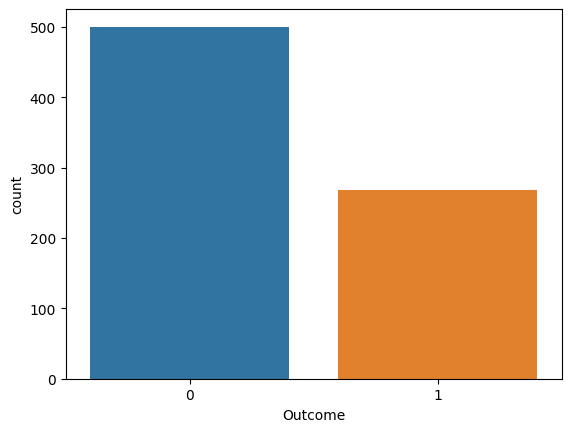

In [26]:
sns.countplot(data=diabetes_count, x = "Outcome", label = "count")
plt.show()

In [27]:
# Diabetes disease count
print("Diabetes People     : ", diabetes_count['Outcome'].value_counts()[1])
print("Non-Diabetes People : ", diabetes_count['Outcome'].value_counts()[0])

Diabetes People     :  268
Non-Diabetes People :  500


In [28]:
# Pregnancies
sql = " select Pregnancies from PatientBio;"
pregnancies_count = pd.read_sql_query(sql,conn)

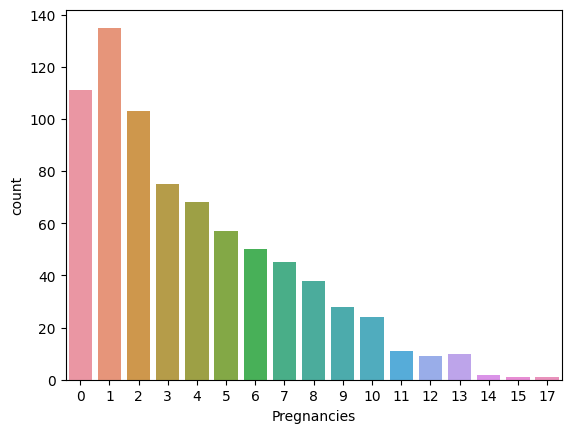

In [29]:
sns.countplot(data=pregnancies_count, x = "Pregnancies", label = "count")
plt.show()

In [11]:
#Age
sql = "select Age from PatientBio"
age = pd.read_sql_query(sql,conn)

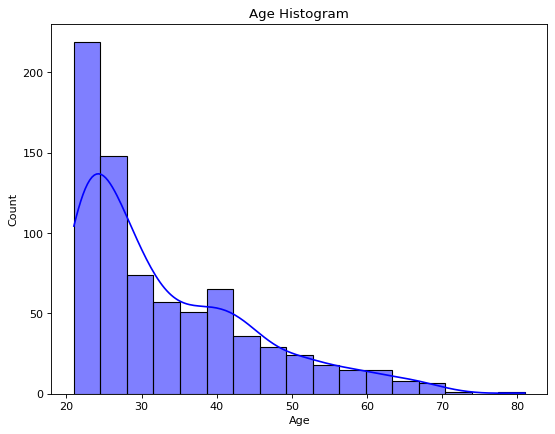

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = age, x='Age', color="Blue", kde=True)
plt.title('Age Histogram')
plt.show()

In [30]:
# Glucose
sql = "select Glucose from Pressure"
gl = pd.read_sql_query(sql,conn)

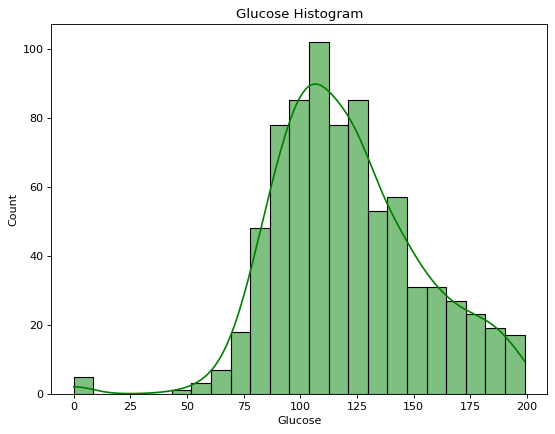

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = gl, x='Glucose', color="Green", kde=True)
plt.title('Glucose Histogram')
plt.show()

In [32]:
# BloodPressure
sql = "select BloodPressure from Pressure"
bp = pd.read_sql_query(sql,conn)

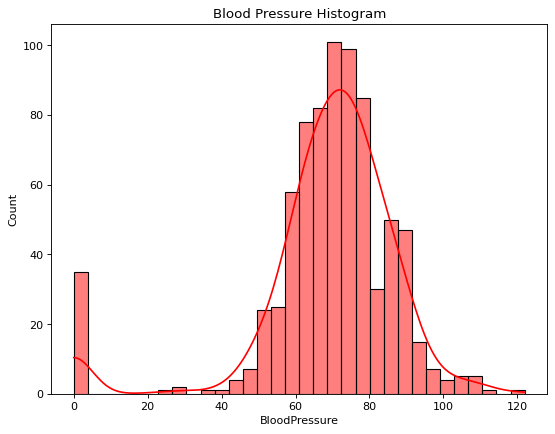

In [33]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = bp, x='BloodPressure', color="Red", kde=True)
plt.title('Blood Pressure Histogram')
plt.show()

In [34]:
#Skinthickness
sql = "select SkinThickness from Health"
sk = pd.read_sql_query(sql,conn)

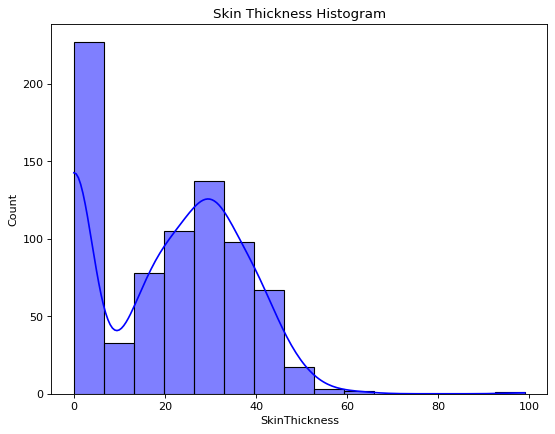

In [35]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = sk, x='SkinThickness', color="Blue", kde=True)
plt.title('Skin Thickness Histogram')
plt.show()

In [36]:
#Insulin
sql = "select Insulin from Pressure"
ins = pd.read_sql_query(sql,conn)

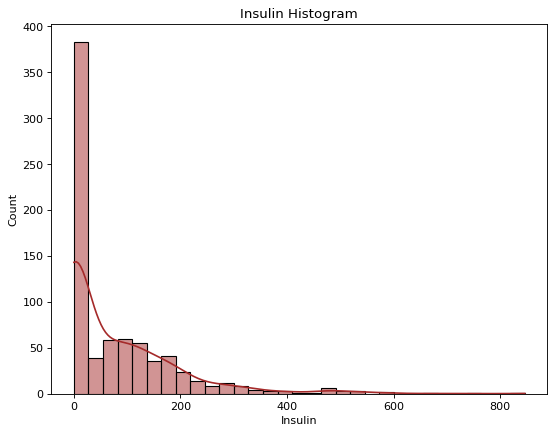

In [37]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = ins, x='Insulin', color="Brown", kde=True)
plt.title('Insulin Histogram')
plt.show()

In [38]:
#BMI
sql = "select BMI from Health"
bmi = pd.read_sql_query(sql,conn)

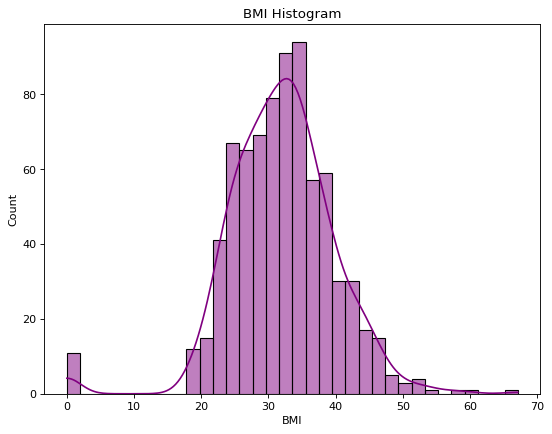

In [39]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = bmi, x='BMI', color="Purple", kde=True)
plt.title('BMI Histogram')
plt.show()

In [40]:
sql = "select DiabetesPedigreeFunction from Health"
dpf = pd.read_sql_query(sql,conn)

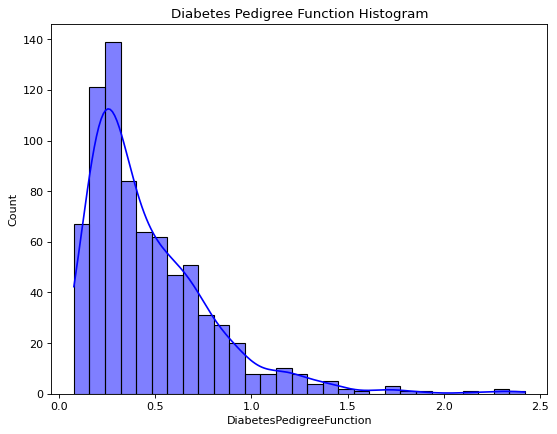

In [41]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = dpf, x='DiabetesPedigreeFunction', color="Blue", kde=True)
plt.title('Diabetes Pedigree Function Histogram')
plt.show()

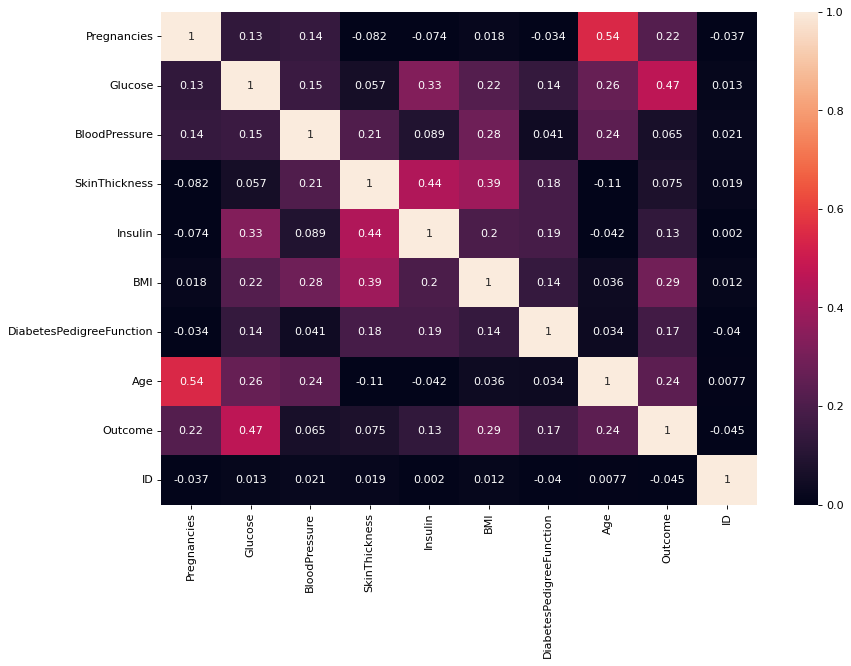

In [42]:
# correlation heatmap
plt.figure(figsize=(12, 8), dpi=80)
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='rocket')
plt.show()


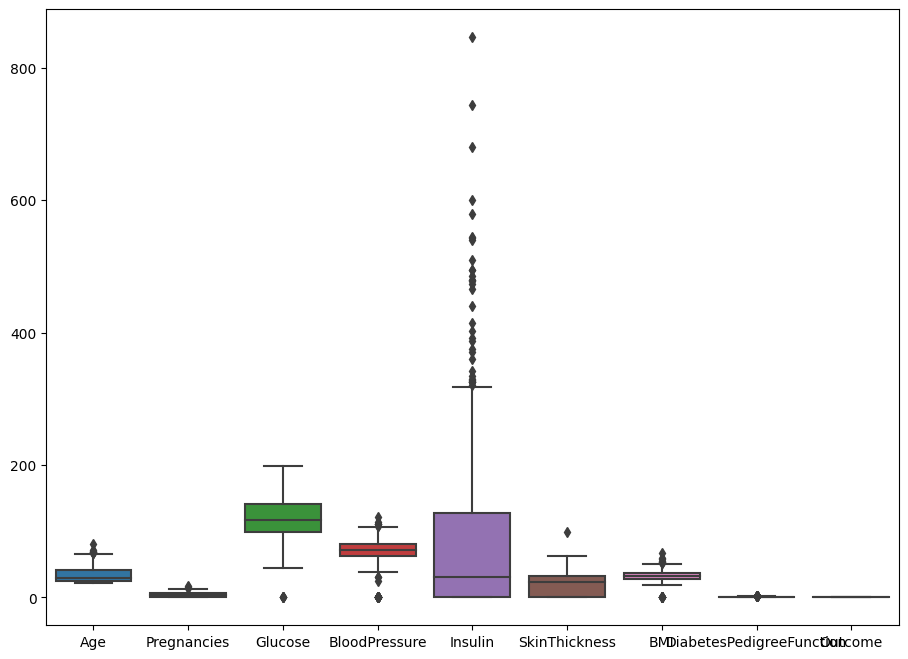

In [43]:
plt.figure(figsize=(11,8))
sns.boxplot(data = d)
plt.show()

In [44]:
# Replacing zero values in glucose, BloodPressure, Skinthickness, Insulin ,BMI
d['Glucose'] = np.where(d['Glucose']==0,d['Glucose'].mean(),d['Glucose'])
d['BloodPressure'] = np.where(d['BloodPressure']==0,d['BloodPressure'].mean(),d['BloodPressure'])
d['SkinThickness'] = np.where(d['SkinThickness']==0,d['SkinThickness'].mean(),d['SkinThickness'])
d['Insulin'] = np.where(d['Insulin']==0,d['Insulin'].mean(),d['Insulin'])


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(d.iloc[:, :-1],d.iloc[:, -1], test_size=0.2,random_state=0)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# Random Forest
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
# accuracy
accuracy_score(y_test,prediction)

0.7792207792207793

In [48]:
# confusion matrix
confusion_matrix(y_test,prediction)

array([[92, 15],
       [19, 28]], dtype=int64)

In [49]:
# AdaBoost Classifier
ab = AdaBoostClassifier()
ab = ab.fit(x_train,y_train)
prediction = ab.predict(x_test)
# Accuracy
accuracy_score(y_test,prediction)

0.7857142857142857

In [50]:
#confusion matrix
confusion_matrix(y_test, prediction)

array([[90, 17],
       [16, 31]], dtype=int64)

In [51]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb = gb.fit(x_train,y_train)
prediction = gb.predict(x_test)
# Accuracy
accuracy_score(y_test,prediction)

0.7987012987012987

In [52]:
# confusion matrix
confusion_matrix(y_test, prediction)

array([[88, 19],
       [12, 35]], dtype=int64)